<a href="https://colab.research.google.com/github/nikishkaaa/ML-Course/blob/main/HW_2_6_%D0%9C%D0%B0%D1%82%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%BD%D0%B5_%D1%84%D0%BE%D1%80%D0%BC%D1%83%D0%BB%D1%8E%D0%B2%D0%B0%D0%BD%D0%BD%D1%8F_%D0%BB%D0%BE%D0%B3%D1%96%D1%81%D1%82%D0%B8%D1%87%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми реалізуємо логістичну регресію на `numpy`.
Ці завдання допоможуть вам ґрунтовно засвоїти основні концепції логістичної регресії та реалізувати їх на практиці 🔥

#### Завдання 1: Реалізація функції сигмоїди
1. З використанням `numpy` напишіть функцію `sigmoid(z)` для обчислення значення сигмоїди згідно з формулою:
   $$
   \sigma(z) = \frac{1}{1 + e^{-z}}
   $$
2. Використовуючи цю функцію, обчисліть значення сигмоїди для наступних даних: $ z = [-2, -1, 0, 1, 2] $. Виведіть результат обчислень.


In [42]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def sigmoid(z):
  qz = 1/(1+ np.exp(-z))
  return qz

In [4]:
z = np.array([-2, -1, 0, 1,])
sigmoid(z)

array([0.11920292, 0.26894142, 0.5       , 0.73105858])



#### Завдання 2: Реалізація функції гіпотези для логістичної регресії
1. Напишіть функцію `hypothesis(theta, X)`, яка обчислює гіпотезу для логістичної регресії, використовуючи функцію сигмоїди. Формула гіпотези:
   $$
   h_\theta(x) = \sigma(\theta^T x) = \frac{1}{1 + e^{-\theta^T x}}
   $$
2. Використайте функцію `hypothesis` для обчислення значень гіпотези для наступних даних:
   
   $\theta = [0.5, -0.5]$
   
   $X = \begin{bmatrix} 1 & 2 \\ 1 & -1 \\ 1 & 0 \\ 1 & 1 \end{bmatrix}$

  Виведіть результат обчислень.


In [5]:
def hypothesis(theta, X):
  hx = sigmoid(np.dot(X,theta))
  return hx

In [6]:
theta = np.array([0.5, -0.5])
X = np.array([[1,2],
              [1, -1],
              [1,0],
              [1,1]])
hypothesis(theta, X)

array([0.37754067, 0.73105858, 0.62245933, 0.5       ])

#### Завдання 3: Реалізація функції для підрахунку градієнтів фукнції втрат
1. Напишіть функцію `compute_gradient(theta, X, y)`, яка обчислює градієнти функції втрат для логістичної регресії. Формула для обчислення градієнта:
   $$
   \frac{\partial L(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} \left[ (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)} \right]
   $$
2. Використайте функцію `compute_gradient` для обчислення градієнтів для наступних даних:

  $\theta = [0.5, -0.5]$

  $X = \begin{bmatrix} 1 & 2 \\ 1 & -1 \\ 1 & 0 \\ 1 & 1 \end{bmatrix}$

  $y = [1, 0, 1, 0]$

  Виведіть результат обчислень.

In [32]:
def compute_gradient(theta, X, y):
   m = len(y)
   h = hypothesis(theta, X)
   return -(1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))

In [33]:
y = np.array([1,0,1,0])

In [34]:
compute_gradient(theta, X, y)

0.8636407091095953


#### Завдання 4: Реалізація повного батч градієнтного спуску

**Задача:**
1. Напишіть функцію `full_batch_gradient_descent(X, y, lr=0.1, epochs=100)`, яка реалізує алгоритм Full градієнтного спуску для логістичної регресії. Використовуйте такі формули:
   - Гіпотеза: $ h_\theta(x) = \sigma(\theta^T x) $
   - Оновлення параметрів: $ \theta_j := \theta_j - \alpha \frac{\partial L(\theta)}{\partial \theta_j} $
2. Використайте функцію `full_batch_gradient_descent` для обчислення параметрів моделі на наступних даних:

  $X = \begin{bmatrix} 1 & 2 \\ 1 & -1 \\ 1 & 0 \\ 1 & 1 \end{bmatrix}$

  $y = [1, 0, 1, 0]$

  Увага! Матриця $X$ вже має стовпець одиниць і передбачається, що це. - стовпець для intercept - параметра зсуву.

  Виведіть результат обчислень.


In [98]:
def full_batch_gradient_descent(X, y, lr=0.01, epochs=100):
    theta = [0, 0]
    errors = []
    for _ in range(epochs):
        hyp = hypothesis(theta, X)
        error = hyp - y
        errors.append(sum(error**2))
        gradient = compute_gradient(theta, X, y)
        theta = theta - lr * gradient
    return theta, errors

In [99]:
X_task4 = [[1,2], [1,-1], [1,0], [1,1]]
y_task4 = np.array([1, 0, 1, 0])
theta, errors = full_batch_gradient_descent(X_task4, y_task4)
theta

array([-0.8771906, -0.8771906])

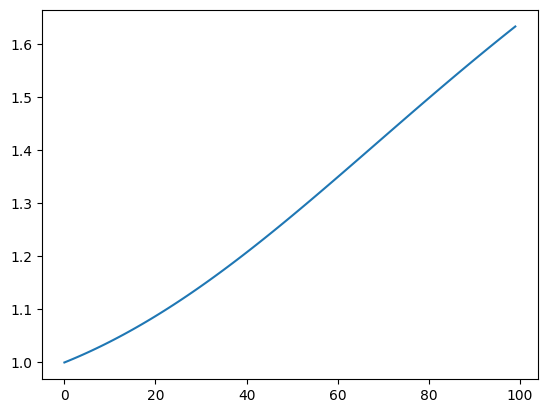

In [100]:
plt.plot(errors)

#### Завдання 5. Обчислення точності моделі

1. Напишіть функцію `predict_proba(theta, X)`, яка використовує знайдені параметри $\theta$ для обчислення ймовірностей належності поточного прикладу з даних до класу $y=1$ на основі значень $\sigma(\theta^T x)$.

2. Напишіть функцію `predict(theta, X, threshold=0.5)`, яка обчислює клас з передбаченої імовірності належності екземпляра до класу 1 з порогом 0.5. Тобто якщо ймовірність менше 0.5, то передбачаємо клас 0, інакше клас 1.

3. Напишіть функцію `accuracy(y_true, y_pred)`, яка обчислює точність моделі, визначивши частку правильно передбачених класів.

  Формула метрики Accuracy:
  $$
  \text{Accuracy} = \frac{\sum_{i=1}^{m} I(\hat{{y}^{(i)}} = y^{(i)})}{m}
  $$

  де $\hat{{y}^{(i)}}$ - передбачене значення класу, $I$ - індикаторна функція (яка дорівнює 1, якщо умова виконується, і 0 - якщо ні), $m$ - кількість прикладів.

4. Обчисліть з використанням даних в завданні 4 $X$, $y$ та обчислених коефіцієнтах $\theta$ та виведіть на екран:
  - передбачені моделлю імовірності належності кожного з екземплярів в матриці `X` до класу 1
  - класи кожного екземпляра з матриці `X`
  - точність моделі.

In [101]:
def predict_proba(theta, X):
  return hypothesis(theta, X)

In [102]:
predict_proba(theta, X_task4)

array([0.06713395, 0.5       , 0.29376029, 0.14749545])

In [103]:
def predict(theta, X, threshold=0.5):
    hyp = hypothesis(theta, X)
    probability = []
    for i in hyp:
        if i<threshold:
            probability.append(0)
        else:
            probability.append(1)
    return probability

In [104]:
y_pred = predict(theta, X_task4)
y_pred

[0, 1, 0, 0]

In [105]:
def accuracy(y_true, y_pred):
    m = len(y_true)
    sum = 0
    for i in range(m):
        if y_true[i]==y_pred[i]:
            sum += 1
    return sum/m

In [106]:
accuracy(y, y_pred)

0.25